<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
# ! pip install --quiet vietocr

# Inference

In [20]:
import matplotlib.pyplot as plt
from PIL import Image as pil
from pkg_resources import parse_version
if parse_version(pil.__version__)>=parse_version('10.0.0'):
    Image.ANTIALIAS=Image.LANCZOS


from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [15]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [16]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [ ]:
detector = Predictor(config)

In [ ]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

In [ ]:
! ls sample | shuf |head -n 5

'Dương Tân Minh'

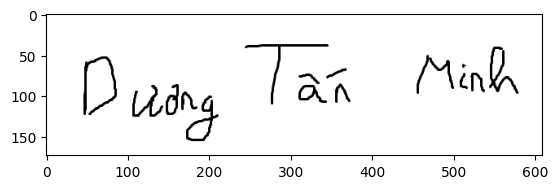

In [22]:
img = '../Untitled1.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [ ]:
! wget https://vocr.vn/data/vietocr/data_line.zip

In [ ]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

You should train model from our pretrained 

In [ ]:
trainer = Trainer(config, pretrained=True)

Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()